
## Assignment List (80 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Transform and plot image. (15 points)
2. Data loading. (10 points)
3. Train the baseline model and plot the learning curve. (15 points)

4. Comparison and analysis (20 points)
    * Compare the training results of 5, 20, and 50 epochs.
    * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 
    * Try a different data_transform function 
5. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results? (10 points)
6. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction. (10 points)
    * Does the model you trained get it right? 
    * If not, what do you think you could do to improve it?
    
## Advanced options (20 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
- A1: Train a complicated model on the dataset (ResNet18) (10 points) \
    **Remenber to resize the image data and recall dataloader**.
- A2: Compare the performance of a simple model (provided by the template) and the complicated model. (5 points)
      Plot learning curves in the same figure axes
- A3: Usage of git version control (5 points)
      Git add, git commit, git log, insert a screenshot within this notebook

### Deadline: 11.59 pm 16/01/2023
### Submit a rar/zip folder to brightspace under the unit of **Machine Learning for Media Production**


## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.__version__, device


('1.13.0+cu117', 'cuda')

## 1. Get data
[Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).
In this assignment, only 3 classes are used to form a small classification dataset, it contains pizza, steak and sushi.
And instead of 1,000 images per class, ervey image class only has 100 images(10%).


In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lizhiqihhh/AIM-MLWorkshop/raw/main/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [3]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Task 1

1. Transform training dataset and testing dataset.
2. Plot images 


## 1.1 Transforming data


In [4]:
# import libraries and packages
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [5]:
# Write transform for image
data_transform = transforms.Compose([
    # Step 1: Resize the images to 64x64
    # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
     transforms.Resize([64, 64]),
    
    # Step 2: Turn the image into a torch.Tensor
    # converts all pixel values from 0-255 to be between 0-1  
    transforms.ToTensor(),
    
    # Step 3: RandomHorizontalFlip---Flip the images randomly on the horizontal p = probability of flip, 0.5 = 50% chance 
    transforms.RandomHorizontalFlip(p=0.5)
    
])

In [6]:
# Use ImageFolder to create dataset(s)

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
           )


In [7]:
len(train_data), len(test_data)

(225, 75)

## 1.2 Plot the transformed image
`Plot_imgs` and `plot_transformed_images` are defined in plot.py, complete the contents in plot.py 

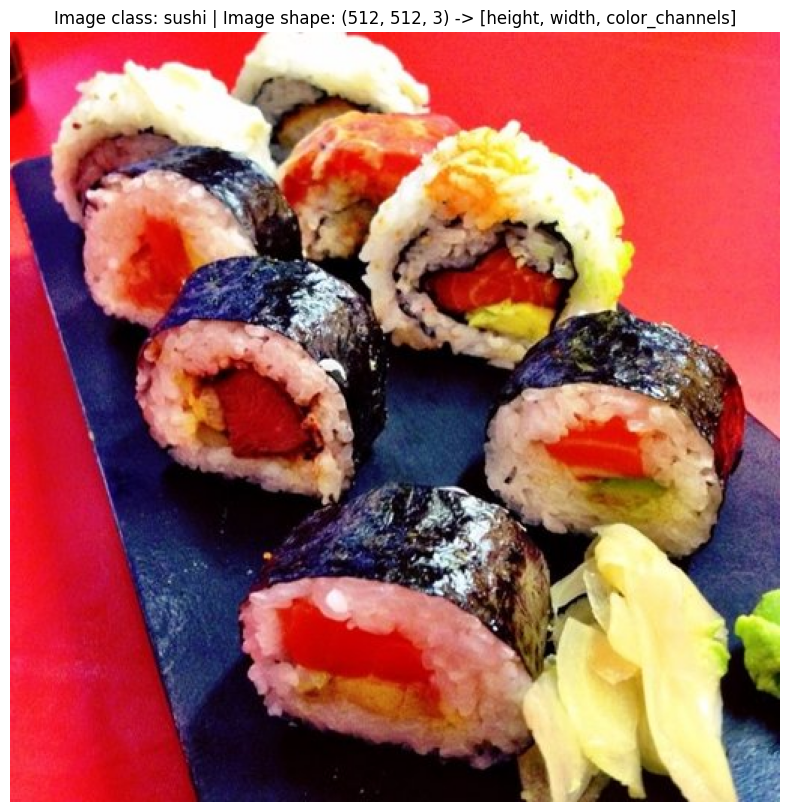

In [8]:
from pathlib import Path
from plot import Plot_imgs

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
class_names = train_data.classes
# Plot an image using matplotlib
# Please complete the plot.py before use this plotting function
# Display random images from ImageFolder created Dataset
Plot_imgs(image_path)

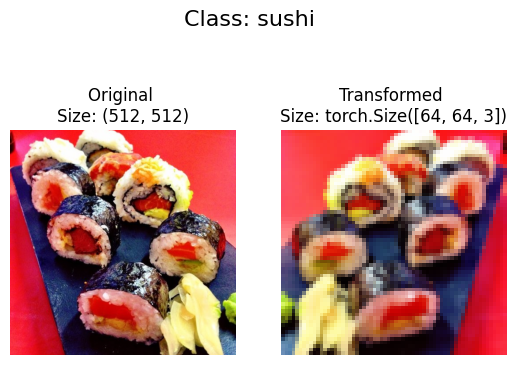

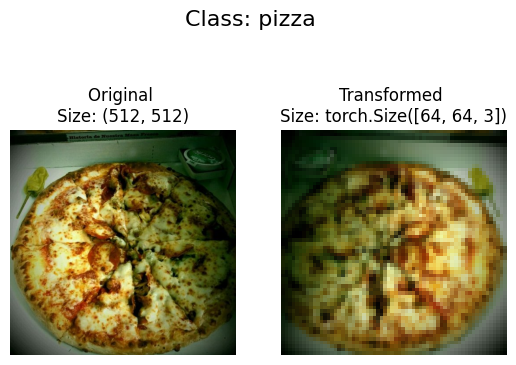

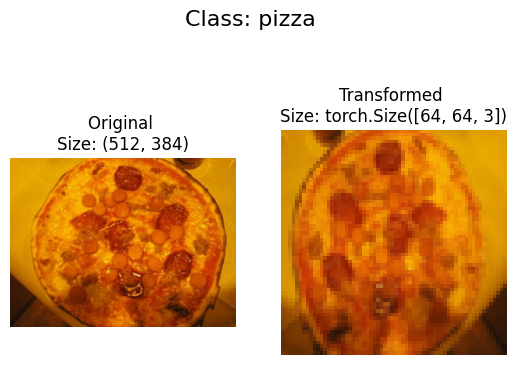

In [9]:
from plot import plot_transformed_images
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [10]:
# Get class names as a list
class_names = train_data.classes
# Try index on the `train_data` and `test_data` `Dataset`'s to find samples and their target labels.
img, label = train_data[0][0], train_data[0][1]
# Print the shape/content/datatype of img and label
print('image shape',img.shape)
print('image content',img)
print('image content',img.dtype)
print('Label',label)

image shape torch.Size([3, 64, 64])
image content tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
        

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

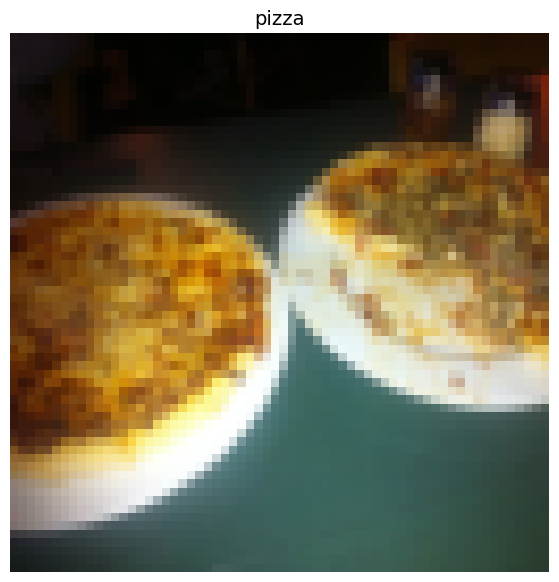

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")


# ---------------Plot the permuted image-------------
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
# ---------------End of code------------------------
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 1.3 Turn loaded images into `DataLoader`'s

## Task 2: Turn train and test Datasets into DataLoaders (10 points)

In [12]:
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, # use train Dataset
                                     batch_size=5, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, # use test Dataset
                                    batch_size=5, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f09e5b5e100>,
 <torch.utils.data.dataloader.DataLoader at 0x7f09e5b5e0a0>)

In [13]:
# Load a batch of images in the training dataset
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([5, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([5])


`display_random_images` is defined in plot.py, please complete the contents in `plot.py`

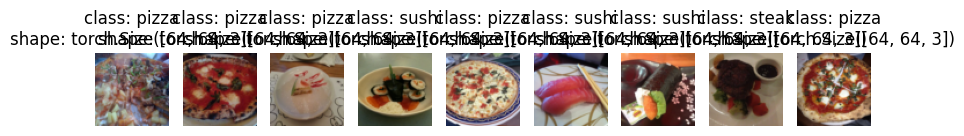

In [14]:
# Display random images from Dataset
from plot import display_random_images
display_random_images(train_data, 
                      n=9, 
                      classes=class_names,
                      seed=None)

## Task 3 Model_0 training
### Task 3.1 Train the baseline model TinyVGG


In [15]:
from TinyVGG import TinyVGG # import the model from TinyVGG.py
torch.manual_seed(42)

# --------------Initialize the TinyVGG model--------------
'''
    Parameters: input_shape
                hidden_units
                output_shape
'''

model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# -------------------  End of code -----------------------

model_0 # Print the model info here!

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [16]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0213,  0.0190, -0.0162]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3377, 0.3370, 0.3253]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
0


In [17]:
# Load the training function from TinyVGG.py
from TinyVGG import train
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_0 --------------------------
# Fill in the parentheses with parameters needed in the train function
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)
# -------------------------  End of code  --------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1050 | train_acc: 0.2978 | test_loss: 1.0958 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0996 | train_acc: 0.3244 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0996 | train_acc: 0.3289 | test_loss: 1.1020 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1002 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0994 | train_acc: 0.3467 | test_loss: 1.1000 | test_acc: 0.3333
Total training time: 4.967 seconds


### Task 3.2: Plot the loss curves of Model_0

From the print outs of our `model_0` training, it didn't look like it did too well.

Create a function to plot the values in the `model_0_results` dictionary.

In [18]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
    # ---------------------- End of codes -----------------------

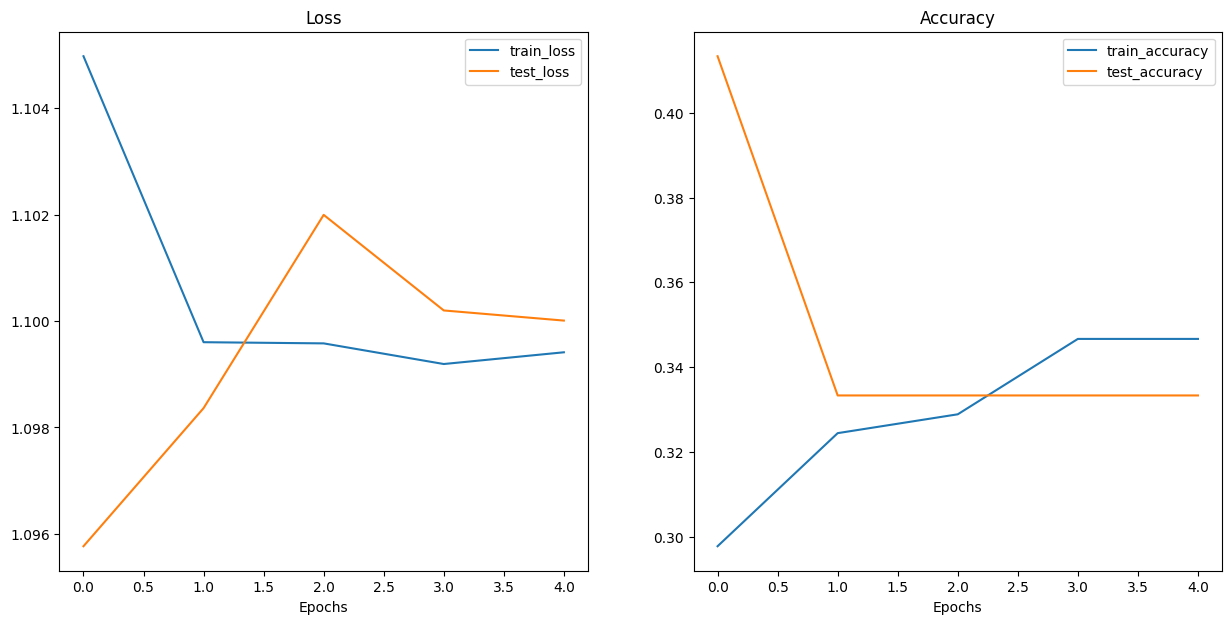

In [19]:
plot_loss_curves(model_0_results)

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.


In [20]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Task 4: Comparison and analysis


### Task 4.1 Try different epochs


In [21]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# create a new instance of TinyVGG model
model_e_5 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_5.parameters(), lr=0.001)

model_e_5_results = train(model=model_e_5, 
                          train_dataloader=train_dataloader,
                          test_dataloader=test_dataloader,
                          optimizer=optimizer,
                          loss_fn=loss_fn, 
                          epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 | train_acc: 0.3111 | test_loss: 1.0964 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.3378 | test_loss: 1.1019 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1025 | train_acc: 0.2711 | test_loss: 1.0955 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.0996 | train_acc: 0.3200 | test_loss: 1.0962 | test_acc: 0.4133
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0966 | test_acc: 0.4133


In [22]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_e_20 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_20.parameters(), lr=0.001)

model_e_20_results = train(model=model_e_20, 
                          train_dataloader=train_dataloader,
                          test_dataloader=test_dataloader,
                          optimizer=optimizer,
                          loss_fn=loss_fn, 
                          epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 | train_acc: 0.3111 | test_loss: 1.0964 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.3378 | test_loss: 1.1019 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1024 | train_acc: 0.2711 | test_loss: 1.0958 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.0998 | train_acc: 0.3200 | test_loss: 1.0964 | test_acc: 0.4133
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.2756 | test_loss: 1.0973 | test_acc: 0.4133
Epoch: 6 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0969 | test_acc: 0.4133
Epoch: 7 | train_loss: 1.0989 | train_acc: 0.3289 | test_loss: 1.0979 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0993 | train_acc: 0.3244 | test_loss: 1.0993 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0992 | train_acc: 0.3289 | test_loss: 1.0993 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.0987 | test_acc: 0.3333
Epoch: 12 | train_l

In [23]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_50 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                          hidden_units=10, 
                          output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_50.parameters(), lr=0.001)

model_e_50_results = train(model=model_e_50, 
                          train_dataloader=train_dataloader,
                          test_dataloader=test_dataloader,
                          optimizer=optimizer,
                          loss_fn=loss_fn, 
                          epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 | train_acc: 0.3111 | test_loss: 1.0964 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.3378 | test_loss: 1.1019 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1013 | train_acc: 0.2800 | test_loss: 1.1087 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.1077 | train_acc: 0.3200 | test_loss: 1.0965 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0996 | train_acc: 0.3467 | test_loss: 1.0973 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0993 | train_acc: 0.3067 | test_loss: 1.0971 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.0993 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0991 | train_acc: 0.3467 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.0992 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3378 | test_loss: 1.0992 | test_acc: 0.3333
Epoch: 12 | train_l

### Compare: Print the differences

In [24]:
import pandas as pd 
model_compare_1 = pd.DataFrame(model_e_5_results)
model_compare_2 = pd.DataFrame(model_e_20_results)
model_compare_3 = pd.DataFrame(model_e_50_results)

model_compare_1

,train_loss,train_acc,test_loss,test_acc
0,1.102704,0.311111,1.096414,0.413333
1,1.100567,0.337778,1.101897,0.333333
2,1.102474,0.271111,1.095464,0.413333
3,1.099581,0.320000,1.096165,0.413333
4,1.099183,0.320000,1.096588,0.413333


### Analysis: What you find and how to improve model_0's performance?

**Your answer**:More epochs you train more train_acc will be achieved

### Task 4.2 Try different data transform functions

In [25]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
# --------- Create training transform with TrivialAugment ---------
# TrivialAugment: Tuning-Free Yet State-of-the-Art Data Augmentation (source:https://arxiv.org/abs/2103.10158)
train_transform_trivial_augment = transforms.Compose([
    # Resize
    transforms.Resize([64, 64]),

    # RandomHorizontalFlip
    transforms.RandomHorizontalFlip(),

    # TrivialAugment
    transforms.TrivialAugmentWide(),

    # ToTensor
    transforms.ToTensor()
    
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)

train_dataloader_augmented =  DataLoader(dataset=train_data_augmented, # use train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?
test_dataloader_simple = DataLoader(dataset=test_data, # use train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?
# ---------------------- End of code ----------------------

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f09c55528e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f09e5b5e0a0>)

In [26]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_1 # print model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [27]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_1 ----------------------------
# Fill in the parentheses with parameters needed in the train function
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)
# ------------------------- End of model_1 ---------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1050 | train_acc: 0.2978 | test_loss: 1.0958 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0996 | train_acc: 0.3244 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0996 | train_acc: 0.3244 | test_loss: 1.1022 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0992 | train_acc: 0.3467 | test_loss: 1.1004 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0974 | train_acc: 0.3778 | test_loss: 1.0994 | test_acc: 0.3333
Total training time: 4.736 seconds


## Task 5: Double the number of hidden units in your model and train it for 20 epochs

In [28]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=20, 
                  output_shape=len(train_data.classes)).to(device) # use 20 hidden units instead of 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1019 | train_acc: 0.2933 | test_loss: 1.0972 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0880 | train_acc: 0.4622 | test_loss: 1.0649 | test_acc: 0.4800
Epoch: 3 | train_loss: 0.9838 | train_acc: 0.5467 | test_loss: 1.0264 | test_acc: 0.5200
Epoch: 4 | train_loss: 0.9231 | train_acc: 0.6267 | test_loss: 1.2346 | test_acc: 0.4667
Epoch: 5 | train_loss: 0.9313 | train_acc: 0.5778 | test_loss: 1.0758 | test_acc: 0.4267
Epoch: 6 | train_loss: 0.8627 | train_acc: 0.6133 | test_loss: 1.0127 | test_acc: 0.5733
Epoch: 7 | train_loss: 0.8357 | train_acc: 0.6222 | test_loss: 1.0086 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7905 | train_acc: 0.6444 | test_loss: 1.0055 | test_acc: 0.5067
Epoch: 9 | train_loss: 0.7707 | train_acc: 0.6356 | test_loss: 1.0155 | test_acc: 0.4933
Epoch: 10 | train_loss: 0.7702 | train_acc: 0.6444 | test_loss: 1.0052 | test_acc: 0.5333
Epoch: 11 | train_loss: 0.7395 | train_acc: 0.6844 | test_loss: 1.0599 | test_acc: 0.4533
Epoch: 12 | train_l

## Task 6: Make prediction on a custom image based on model_2


In [29]:
# Read a custom image from img_path and represent it as a tensor datatype
import torchvision

img_path = './data/'
custom_image = img_path + "img1.jpg"
img = torchvision.io.read_image(custom_image)


Resized image shape: 
 torch.Size([3, 64, 64])
Add batch dim: 
 torch.Size([1, 3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

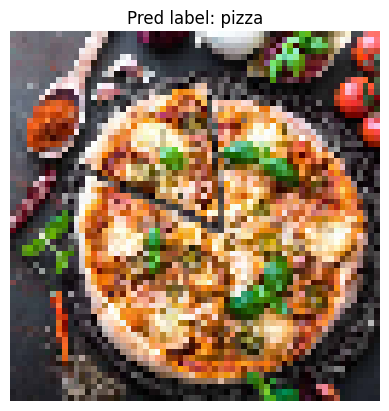

In [30]:
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize([64, 64])
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img.unsqueeze(0).to(device) # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img) 
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     


In [31]:
# Create transform pipleine to resize image
img_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
img_transformed = img_transform(img)

# Print out original shape and new shape
print(f"Original shape: {img.shape}")
print(f"New shape: {img_transformed.shape}")

Original shape: torch.Size([3, 64, 64])
New shape: torch.Size([3, 64, 64])


### Analysis
Does the model you trained get it right?
If not, how to improve it?\
**Your answer:**Yes, my model gave the proper preb label: pizza

## Advanced tasks
### A1: Train a complicated model (Use ResNet18 as an example) (10 points)

### Read `Resnet18_pytorch.py` and complete the model file
> If you finish `Resnet18_pytorch.py` correctly, run the following line will generate a vector with shape = ([1,3])

In [33]:
%%bash
python3.9 Resnet18_pytorch.py

Dimensions of the last convolutional feature map:  torch.Size([1, 512, 7, 7])
torch.Size([1, 3])Output feature size.


In [34]:
from Resnet18_pytorch import ResNet, BasicBlock
torch.manual_seed(42)
model_resnet = ResNet(img_channels=3, num_layers=18, block=BasicBlock, num_classes=3).to(device)
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Preparing train dataloader and test dataloader


In [35]:
BATCH_SIZE=32
NUM_WORKERS=2
# ----- Complete the following transform functions -----
train_transform_augment = transforms.Compose([
     # Resize
    transforms.Resize([64, 64]),

    # RandomHorizontalFlip
    transforms.RandomHorizontalFlip(),

    # RandomAugment
    transforms.RandAugment(),

    # ToTensor
    transforms.ToTensor()
   
])
#  ----------------  End of code --------------------
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_augment)
train_dataloader_resnet =  DataLoader(dataset=train_data_augmented, # use train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?
test_dataloader_simple = DataLoader(dataset=test_data, # use train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

train_dataloader_resnet, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f09e5b4f130>,
 <torch.utils.data.dataloader.DataLoader at 0x7f09e5b5e0a0>)

#### Start training

In [36]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
model_resnet_results = train(
                        model=model_1, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS
)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0841 | train_acc: 0.4400 | test_loss: 1.0651 | test_acc: 0.4667
Epoch: 2 | train_loss: 0.9736 | train_acc: 0.5600 | test_loss: 1.0620 | test_acc: 0.4667
Epoch: 3 | train_loss: 0.8875 | train_acc: 0.6000 | test_loss: 0.9958 | test_acc: 0.3733
Epoch: 4 | train_loss: 0.8565 | train_acc: 0.6000 | test_loss: 1.0370 | test_acc: 0.4533
Epoch: 5 | train_loss: 0.8512 | train_acc: 0.6444 | test_loss: 1.0765 | test_acc: 0.4133
Total training time: 4.804 seconds


### A2: Compare model performance (5 points)
Choose a previous model used in **Task 3** (model_0) or **Task 4** (model_1) to compare with ResNet18 model

In [37]:
from torchinfo import summary
summary(model_resnet) # do a test pass through of an example input size

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─BasicBlock: 2-1                   --
│    │    └─Conv2d: 3-1                  36,864
│    │    └─BatchNorm2d: 3-2             128
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  36,864
│    │    └─BatchNorm2d: 3-5             128
│    └─BasicBlock: 2-2                   --
│    │    └─Conv2d: 3-6                  36,864
│    │    └─BatchNorm2d: 3-7             128
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  36,864
│    │    └─BatchNorm2d: 3-10            128
├─Sequential: 1-6                        --
│    └─BasicBlock: 2-3                   --
│    │    └─Sequential: 3-11             8,448


### Plot the train_loss and test_loss of model_resnet and a previous model using subplot function

In [38]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results) # Or model_1

model_resnet_df = pd.DataFrame(model_resnet_results)
model_0_df, model_resnet_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.104973   0.297778   1.095769  0.413333
 1    1.099601   0.324444   1.098363  0.333333
 2    1.099579   0.328889   1.101993  0.333333
 3    1.099191   0.346667   1.100198  0.333333
 4    1.099412   0.346667   1.100007  0.333333,
    train_loss  train_acc  test_loss  test_acc
 0    1.084051   0.440000   1.065104  0.466667
 1    0.973568   0.560000   1.061981  0.466667
 2    0.887464   0.600000   0.995829  0.373333
 3    0.856506   0.600000   1.036964  0.453333
 4    0.851195   0.644444   1.076457  0.413333)

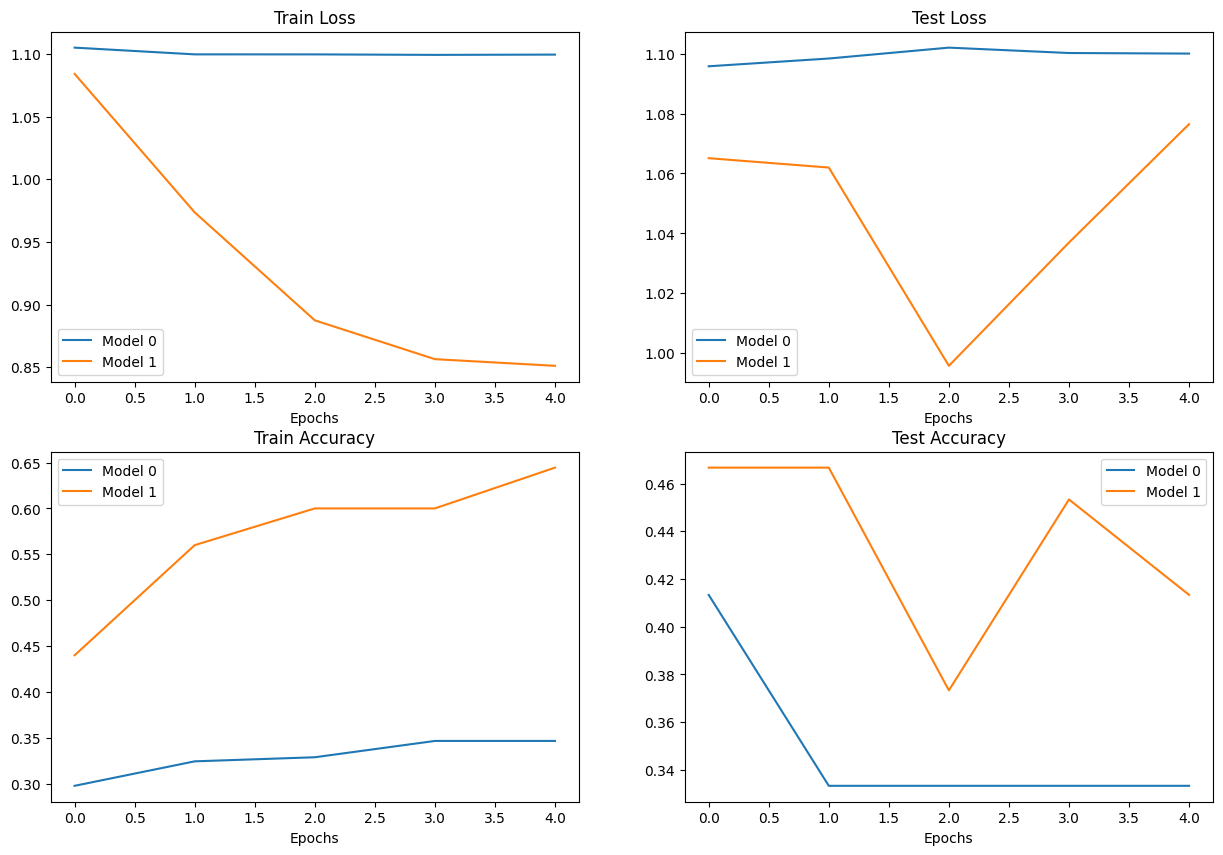

In [39]:
# ------ Complete subplot functions in the following lines -------
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_resnet_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_resnet_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_resnet_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_resnet_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

### A3: Git version control (5 points)
Please insert an image in the cell to show your git log

### Git version control advices
1. Create a remote repo, upload this notebote to the repo\
   **Take a screenshot of the inital status**
2. git clone (ssh link of the repo)
3. Make some modifications to the files
4. git add .
5. git commit -m "leave some message here"
6. git push
7. git log
8. check the remote repo, **Take a screenshot after git push operations**

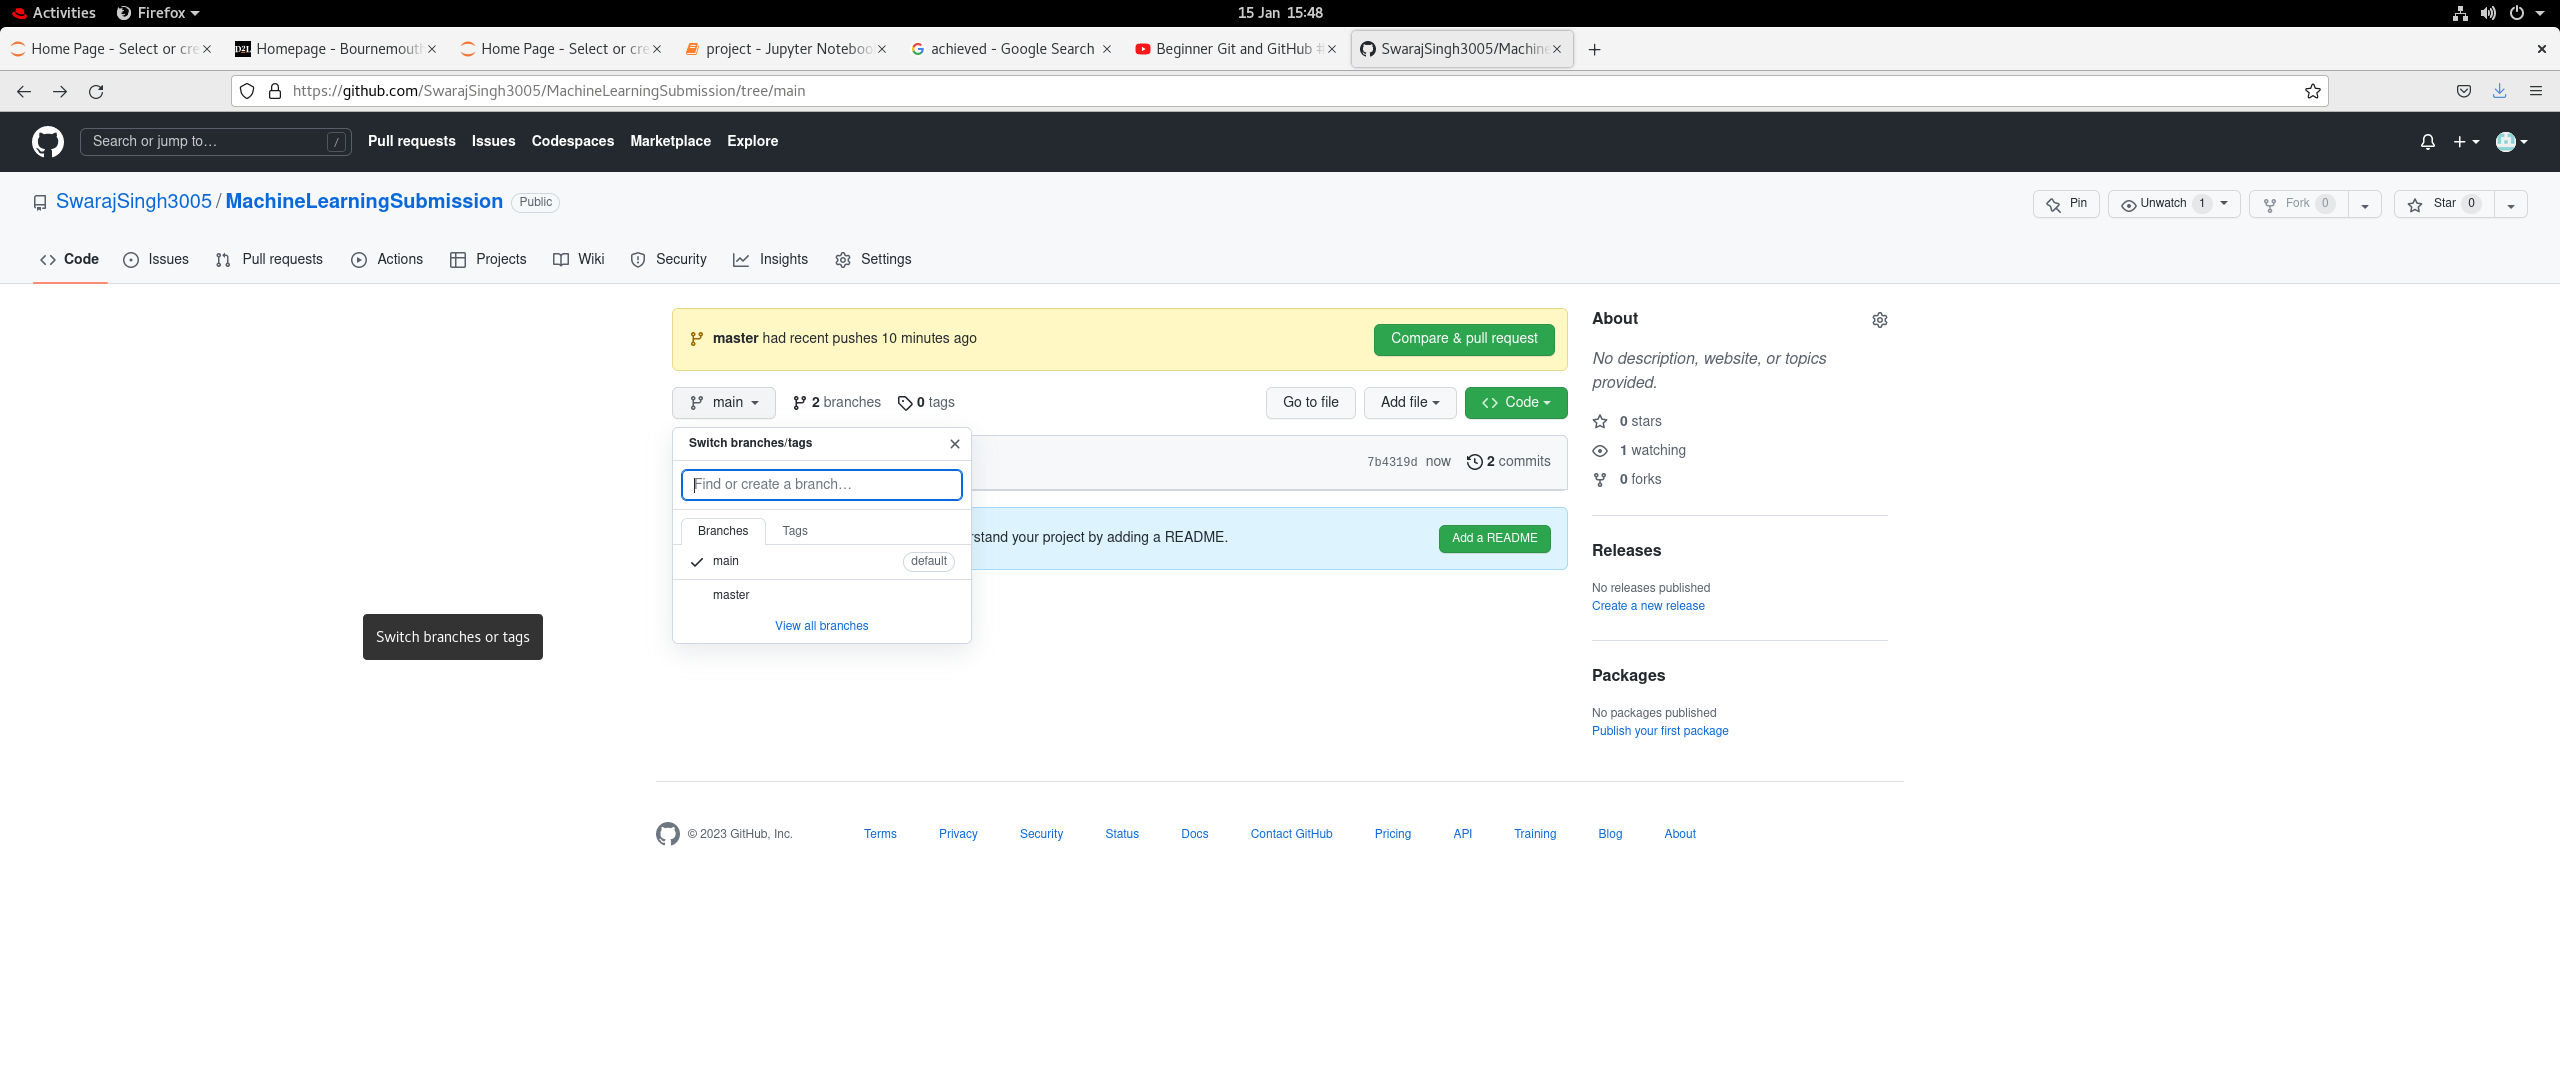

In [40]:
from IPython.display import Image
Image("git.png",width=900,height=500)

In [ ]:
Image("git pull.png",width=994,height=655)

In [ ]:
Image("git merge.png")

In [ ]:
Image("git push steps.png")

In [ ]:
Image("before.png")

In [ ]:
Image("after.png")

In [ ]:
Image("gitlog.png")